# Tensorflow 2.0 tests

In [124]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
print(tf.__version__)

2.0.0-alpha0


In [125]:
# Import dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [126]:
# Explore dataset 1
print(f'x_train\'s shape: {x_train.shape}')
print(f'y_train\'s shape: {y_train.shape}')
print(f'x_test\'s shape: {x_test.shape}')
print(f'y_test\'s shape: {y_test.shape}')
print(f'Example data label (y_train[0]): {y_train[0]}')
#print(f'Example data (x_train[0]): {x_train[0]}')

x_train's shape: (60000, 28, 28)
y_train's shape: (60000,)
x_test's shape: (10000, 28, 28)
y_test's shape: (10000,)
Example data label (y_train[0]): 5


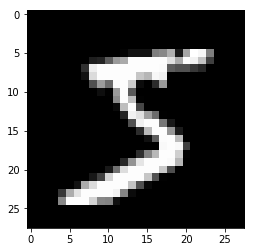

In [127]:
# Explore dataset 2
i = 0
plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [128]:
# Normalize it
x_train, x_test = x_train / 255.0, x_test / 255.0

In [129]:
# Create model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [130]:
# Train
checkpoint_path = './model/training/checkpoints/cp_mnist.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=False,
                                                 verbose=1)
model.fit(x_train, y_train, 
          epochs=5,
          callbacks=[cp_callback])
!ls {checkpoint_dir}

Epoch 1/5
59808/60000 [============================>.] - ETA: 0s - loss: 0.2180 - accuracy: 0.9368
Epoch 00001: saving model to ./model/training/checkpoints/cp_mnist.ckpt
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2177 - accuracy: 0.9369
Epoch 2/5
59520/60000 [============================>.] - ETA: 0s - loss: 0.0961 - accuracy: 0.9710
Epoch 00002: saving model to ./model/training/checkpoints/cp_mnist.ckpt
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0961 - accuracy: 0.9710
Epoch 3/5
59904/60000 [============================>.] - ETA: 0s - loss: 0.0676 - accuracy: 0.9786
Epoch 00003: saving model to ./model/training/checkpoints/cp_mnist.ckpt
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0675 - accuracy: 0.9786
Epoch 4/5
59968/60000 [============================>.] - ETA: 0s - loss: 0.0543 - accuracy: 0.9829
Epoch 00004: saving model to ./model/training/checkpoints/cp_mnist.ckpt
60000/60000 [===============

In [131]:
# Test
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.0674 - accuracy: 0.9805


[0.06739834576133871, 0.9805]

In [132]:
i = 0
prediction = model.predict(np.array([x_test[i]]))
prediction = prediction.argmax()
print(f'Predicted "{prediction}" and it is "{y_test[i]}"')

Predicted "7" and it is "7"


In [136]:
# Save model
save_path = './model/training/model.h5'
model.save(save_path)
!ls {os.path.dirname(save_path)}

checkpoints model.h5


In [138]:
# Load weights from checkpoint
print('Loaded model from weights only:')
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

# Load full model from checkpoints
print('Loaded full model:')
model2 = tf.keras.models.load_model(save_path)
loss,acc = model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

Loaded model from weights only:
10000/10000 [==============================] - 0s 35us/sample - loss: 0.0674 - accuracy: 0.9805
Restored model, accuracy: 98.05%
Loaded full model:
10000/10000 [==============================] - 0s 30us/sample - loss: 0.0674 - accuracy: 0.9805
Restored model, accuracy: 98.05%
